## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [3]:
#імпорт необхідних бібліотек

import numpy as np
import pandas as pd


In [7]:
import os
os.getcwd()

'/Users/mariaslovinska/Desktop/data lovers/Домашка статистики'

In [10]:
file_path = "data_statistics/data.csv"

In [13]:
df = pd.read_csv(file_path)

# Збереження значень колонки 'data' у форматі np.ndarray
data = df['data'].to_numpy()

In [16]:
data[:5]  # Вивести перші 5 елементів для перевірки

array([17.49945292, 19.66239904,  7.18282343, 29.84162485,  9.23938649])

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [18]:
data.shape


(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

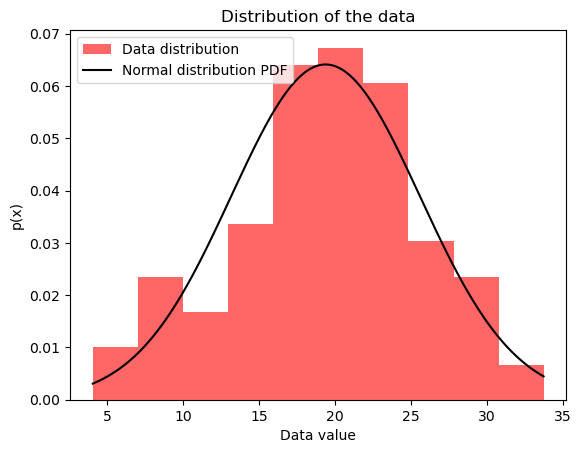

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats
x_axis = np.arange(data.min(), data.max(), 0.01)
pdf = stats.norm.pdf(x_axis, np.mean(data), np.std(data))

plt.hist(data, bins=10, density=True, alpha=0.6, color='r', label='Data distribution')
plt.plot(x_axis, pdf, 'k', label='Normal distribution PDF')
plt.title('Distribution of the data')
plt.xlabel('Data value')
plt.ylabel('p(x)')
plt.legend()
plt.show()

x_axis = np.arange(data.min(), data.max(), 0.01)

де 0.01 — це крок між значеннями на осі X, тобто відстань між сусідніми точками. Це дозволяє мати більш гладку лінію, якщо ви накладаєте PDF (ймовірнісну густину) на гістограму.
Вибір кроку:

Крок 0.01 вибраний умовно, щоб розподіл був достатньо детальним. Занадто великий крок (наприклад, 1) може зробити лінію занадто грубою, і PDF не буде чітко відображати форму розподілу.
Занадто маленький крок (наприклад, 0.001) може зробити графік дуже детальним і може додати непотрібну складність, оскільки він створить велику кількість точок для відображення.

Висновок: На мій погляд дані розподілені не дуже нормально. не можна назвати гаусівським, є трохи скошення ліворуч. Подивимося на QQ-Plot детальніше.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

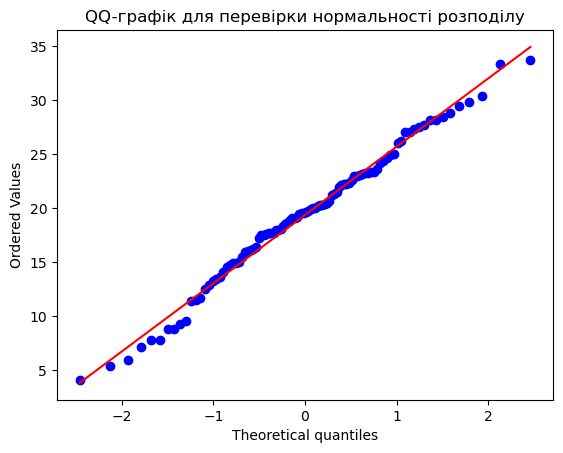

In [48]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(data, dist="norm", plot=plt)
plt.title("QQ-графік для перевірки нормальності розподілу")
plt.show()

Висновок:
Трохи є Ліво-скошений розподіл на хвостах, але в основному прямує до нормального розподілу.  Більшість даних зосереджена навколо середнього значення, але є деякі екстремальні значення, які відхиляються від норми.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [51]:
stat, p_value = stats.shapiro(data)


print(f"Статистика : {stat}")
print(f"P-value: {p_value}")


alpha = 0.05  
if p_value <= alpha:
    print("Відхиляємо нульову гіпотезу: дані не розподілені нормально.")
else:
    print("Не можемо відхилити нульову гіпотезу: дані розподілені нормально.")

Статистика : 0.9887855685963715
P-value: 0.5677973106978921
Не можемо відхилити нульову гіпотезу: дані розподілені нормально.


Висновок: Наші дані відповідають нормальному розподілу